<a href="https://colab.research.google.com/github/Vyoma-garg/Deep_Learning/blob/main/12_Supervised_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

In [2]:
reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

In [3]:
#taking 30 as vocab size 

one_hot("amazing restaurant", 30)

[18, 13]

In [21]:
vocab_size=50

encoded_reviews= [one_hot(d, vocab_size) for d in reviews]
print(encoded_reviews)

[[6, 24], [34, 39], [16, 1], [11, 18, 34], [20, 21, 48], [34, 24], [5, 21, 28], [36, 36], [36, 14], [32, 13]]


In [22]:
max_length=3
padded_reviews= pad_sequences(encoded_reviews, maxlen= max_length, padding='post')
print(padded_reviews)

[[ 6 24  0]
 [34 39  0]
 [16  1  0]
 [11 18 34]
 [20 21 48]
 [34 24  0]
 [ 5 21 28]
 [36 36  0]
 [36 14  0]
 [32 13  0]]


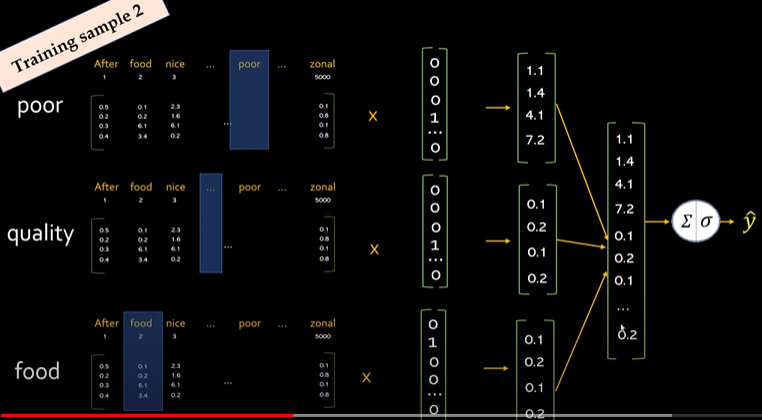

In [23]:
embedded_vector_size=4

'''
1. embeding layer say randomly init of size here 4x 50( embedded_vector size X vocab_size)=== basically the weights 
2. input words as one hot encoded and padded numbers multiplied with weights (embedding layer)
3. u will get max_length of words X embedded_vector_size == here 3 different embedded vectors of size 4
4. flattening them into 3x4 =12 one vector 
5. passing through neuron (1 here as sentiment classification with sigmoid) == y_hat prediction
'''

model= Sequential()
model.add(Embedding(vocab_size, embedded_vector_size, input_length=max_length, name='embedding'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


x= padded_reviews
y= sentiment

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(x, y , epochs=50)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 4)              200       
                                                                 
 flatten_4 (Flatten)         (None, 12)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 0s 452ms/step - loss: 0.6922 - accuracy: 0.7000
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.7000
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.7000
Epoch 4/50
1/1 [==============

In [24]:
model.evaluate(x,y)

1/1 [==============================] - 0s 114ms/step - loss: 0.6368 - accuracy: 0.9000


[0.6368268132209778, 0.8999999761581421]

In [25]:
weights= model.get_layer('embedding').get_weights()[0]
len(weights)
weights

array([[-0.03192814,  0.08023646, -0.04637603, -0.07690343],
       [-0.06950405,  0.09442551, -0.08182254, -0.07261613],
       [-0.00150754,  0.01596751,  0.03815338,  0.03511372],
       [-0.00743882,  0.0128446 , -0.01106757, -0.04509013],
       [ 0.02254976,  0.03942838, -0.04335191, -0.04035112],
       [ 0.03927858,  0.06655964,  0.01721564,  0.04647298],
       [-0.09073259, -0.03075394, -0.09253832, -0.0796477 ],
       [ 0.00693872, -0.02841957,  0.049994  , -0.01184912],
       [ 0.0391049 ,  0.04789016,  0.01831622, -0.02519075],
       [-0.01386825,  0.037123  , -0.00711901, -0.01889067],
       [-0.02207809, -0.00102689,  0.04746058,  0.01777426],
       [-0.08639096, -0.05275231, -0.05418975, -0.09483512],
       [-0.02387782,  0.01636976,  0.00871587,  0.02343524],
       [ 0.09939577, -0.00214396,  0.09976751,  0.02483524],
       [ 0.08542617, -0.01112477,  0.04081235,  0.0906633 ],
       [-0.03431245, -0.03067557,  0.03798908,  0.04682935],
       [-0.06112668, -0.

In [26]:
weights.shape

(50, 4)

In [27]:
#for word nice, encoded number =6 out of 50

weights[6]

array([-0.09073259, -0.03075394, -0.09253832, -0.0796477 ], dtype=float32)

In [28]:
weights[34]

array([-0.00082392, -0.06874125,  0.07179803,  0.01039485], dtype=float32)